In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = 'data/digits/'
os.makedirs('{PATH}models', exist_ok=True)
os.makedirs('{PATH}/tmp', exist_ok=True)

In [4]:
!ls {PATH}

models	sample_submission.csv  test.csv  tmp  train.csv


In [5]:
len(list(open(f'{PATH}train.csv')))

42001

In [6]:
df = pd.read_csv(f'{PATH}train.csv')

In [ ]:
image = df.iloc[0].values[1:].reshape(28,28)

In [ ]:
plt.imshow(image)

In [ ]:
df.drop(['label'], axis=1).shape

In [ ]:
np.stack((df.drop(['label'], axis=1).values.reshape(-1,28,28),)*3, axis=1).shape

In [7]:
X = np.stack((df.drop(['label'], axis=1).values.reshape(-1,28,28),)*3, axis=1)
X.shape

(42000, 3, 28, 28)

In [ ]:
plt.imshow(X[67])

In [8]:
y = np.array(df['label'])

In [9]:
n = len(X)
val_idxs = get_cv_idxs(n)

In [ ]:
len(list(val_idxs))

In [10]:
X_valid = X[val_idxs].astype(np.float32)
y_valid = y[val_idxs]

mask = np.ones(len(X), np.bool)
mask[val_idxs] = 0
X_train = X[mask].astype(np.float32)
y_train = y[mask]

In [11]:
X_valid.shape, y_valid.shape, X_train.shape, y_train.shape

((8400, 3, 28, 28), (8400,), (33600, 3, 28, 28), (33600,))

In [13]:
classes=sorted(list(df['label'].unique()))

In [14]:
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
model=resnet34
sz=28
tfms = tfms_from_model(model, sz, aug_tfms=transforms_basic)

In [16]:
df_test = pd.read_csv(f'{PATH}test.csv')

In [17]:
test = np.stack((df_test.values.reshape(-1,28,28),)*3, axis=1).astype(np.float32)
test.shape

(28000, 3, 28, 28)

In [24]:
data = ImageClassifierData.from_arrays(PATH, (X_train, y_train), (X_valid, y_valid), tfms=tfms, classes=classes, test=np.array(test))

In [ ]:
plt.imshow(data.trn_ds.get_x(67)[0])

In [25]:
learn = ConvLearner.pretrained(model, data, precompute=True)

In [27]:
lrf=learn.lr_find()

 83%|████████▎ | 438/525 [00:05<00:01, 76.06it/s, loss=5.22]


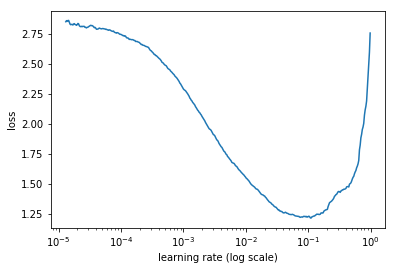

In [28]:
learn.sched.plot()

In [29]:
lr = 1e-2
learn.fit(lr, 1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.892159   0.719577   0.742024  



[array([0.71958]), 0.7420238095238095]

In [30]:
learn.precompute=False

In [31]:
learn.fit(lr, 3, cycle_len=1)

  0%|          | 0/525 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (28,28,28) (3,) 

In [ ]:
%debug

> /home/sam/fastai/courses/dl1/fastai/transforms.py(164)__call__()
    162 
    163     def __call__(self, x, y=None):
--> 164         x = (x-self.m)/self.s
    165         if self.tfm_y==TfmType.PIXEL and y is not None: y = (y-self.m)/self.s
    166         return x,y

ipdb> x
array([[[0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
        [0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
        [0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
        ...,
        [0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
        [0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
        [0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053]],

       [[0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
        [0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
        [0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
        ...,
        [0.38053, 0.38053, 0.38053, ..., 0.38053, 0.38053, 0.38053],
   

In [ ]:
%debug